In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
    

### Function definition

In [92]:
def function(x):
    y1 = x[0]**3 - x[1]
    y2 = y1**2
    z1 = x[1] - x[0]
    z2 = 2 * (z1**4)
    return y2 + z2 

In [7]:
function(2,1)

51

### Stopping Criteria

In [99]:
def norm(x):
    return np.sqrt((x[0]**2)+(x[1]**2))

def x_criteria(x1:list, x2:list):
    diff = [x1[i]-x2[i] for i in range(len(x1))]
        
    if (norm(diff) <= 0.01):
        return True
    else:
        return False
    
def fx_criteria(f1,f2):
    high = max(f1,f2)
    low = min(f1,f2)
    diff = high-low
    if (diff/f1 <= 0.001):
        return True
    else:
        return False

In [182]:
# Optimization algorithms
def cyclic_coordinate(x_init:list,max_iter=200, termination_criteria='x'):
    d = [np.array([1, 0]), np.array([0, 1])]
    x = [x_init.copy()]
    f = []
    p = symbols("p")
    
    for i in range(max_iter):
        f.append(function(x[-1].copy()))
        y = [x[-1].copy()]
        print(y)
        for j in range(2):
            z = y[j] + d[j]*p
            roots = solve(function(z), p, domain="RR")
            real_parts = [float(root.as_real_imag()[0]) for root in roots]
            y.append(y[j] + d[j]*float(real_parts[0]))

        x.append(y[-1].copy())

        if termination_criteria == 'x':
            if x_criteria(x[-1],x[-2]):
                break
        elif termination_criteria == 'fx':
            if fx_criteria(function(x[-1]),function(x[-2])):
                break



    return x,f


In [183]:
cyclic_cordinate_fx_criteria_coord, cyclic_cordinate_fx_criteria_func = cyclic_coordinate([1,2], termination_criteria='fx')

[[1, 2]]
[array([0.65012382, 0.35997761])]
[array([-0.65351614, -0.94314854])]
[array([-0.98065374, -1.01802251])]
[array([-1.00597254, -1.01801785])]
[array([-1.005971  , -1.01801318])]
[array([-1.00596946, -1.01800852])]
[array([-1.00596792, -1.01800386])]
[array([-1.00596639, -1.0179992 ])]
[array([-1.00596485, -1.01799455])]
[array([-1.00596332, -1.0179899 ])]
[array([-1.00596179, -1.01798526])]
[array([-1.00596026, -1.01798062])]
[array([-1.00595873, -1.01797598])]
[array([-1.0059572 , -1.01797135])]
[array([-1.00595568, -1.01796672])]
[array([-1.00595415, -1.01796209])]
[array([-1.00595263, -1.01795747])]
[array([-1.0059511 , -1.01795285])]
[array([-1.00594958, -1.01794824])]
[array([-1.00594806, -1.01794362])]
[array([-1.00594654, -1.01793902])]
[array([-1.00594502, -1.01793441])]
[array([-1.0059435 , -1.01792981])]
[array([-1.00594199, -1.01792521])]
[array([-1.00594047, -1.01792062])]
[array([-1.00593896, -1.01791603])]
[array([-1.00593745, -1.01791144])]
[array([-1.00593593, 

In [184]:
cyclic_cordinate_x_criteria_coord,cyclic_cordinate_x_criteria_func = cyclic_coordinate([1,2], termination_criteria='x')

[[1, 2]]
[array([0.65012382, 0.35997761])]
[array([-0.65351614, -0.94314854])]
[array([-0.98065374, -1.01802251])]
[array([-1.00597254, -1.01801785])]


### Steepest Descent

In [128]:
def gradient(x1, x2):
    df_dx1 = 2 * (x1**3 - x2) * (3 * x1**2) - 8 * (x2 - x1)**3
    df_dx2 = -2 * (x1**3 - x2) + 8 * (x2 - x1)**3
    return np.array([df_dx1, df_dx2])

In [ ]:
def steepest_descent(x_init, max_iter=1000, alpha=0.01, termination_criteria='x'):
    x = [np.array(x_init.copy())]
    f = []

    for i in range(max_iter):
        y = x[-1].copy()
        print(y)
        f.append(function(y))
        grad = gradient(y[0], y[1])
        x.append(y - alpha * grad)

        if termination_criteria == 'x':
            if x_criteria(x[-1],x[-2]):
                break
        elif termination_criteria == 'fx':
            if fx_criteria(function(x[-1]),function(x[-2])):
                break
    return x,f

In [161]:
steepest_descent_fx_criteria_coord, steepest_descent_fx_criteria_func = steepest_descent([1,3], termination_criteria='fx')

[1 3]
[1.76 2.32]
[1.19198992 2.36858624]
[1.37983888 2.22477864]
[1.38213064 2.18456833]
[1.37123574 2.15234667]
[1.3613055  2.12273948]
[1.3521507  2.09542159]
[1.34367349 2.07010651]
[1.3357936  2.04655593]
[1.32844363 2.02456992]
[1.32156648 2.00397931]
[1.31511334 1.98463976]
[1.30904224 1.96642729]
[1.30331683 1.94923464]
[1.29790545 1.93296847]
[1.29278039 1.91754712]
[1.28791725 1.90289878]
[1.28329445 1.88895998]
[1.27889284 1.87567437]
[1.27469534 1.86299177]
[1.27068666 1.85086725]
[1.26685308 1.83926051]
[1.26318224 1.82813522]
[1.25966296 1.81745856]
[1.2562851  1.80720079]
[1.25303948 1.79733488]
[1.24991769 1.7878362 ]
[1.24691208 1.77868225]
[1.24401564 1.76985243]
[1.24122192 1.76132784]
[1.23852503 1.75309109]
[1.23591949 1.74512616]
[1.23340029 1.73741827]
[1.23096278 1.72995373]
[1.22860263 1.72271988]
[1.22631586 1.71570495]
[1.22409876 1.70889801]
[1.22194786 1.70228888]
[1.21985994 1.69586806]
[1.217832   1.68962669]
[1.21586122 1.6835565 ]
[1.21394498 1.67764972

In [162]:
steepest_descent_x_criteria_coord, steepest_descent_x_criteria_func = steepest_descent([1,3], termination_criteria='x')

[1 3]
[1.76 2.32]
[1.19198992 2.36858624]
[1.37983888 2.22477864]
[1.38213064 2.18456833]
[1.37123574 2.15234667]
[1.3613055  2.12273948]
[1.3521507  2.09542159]
[1.34367349 2.07010651]
[1.3357936  2.04655593]
[1.32844363 2.02456992]
[1.32156648 2.00397931]
[1.31511334 1.98463976]
[1.30904224 1.96642729]
[1.30331683 1.94923464]
[1.29790545 1.93296847]
[1.29278039 1.91754712]
[1.28791725 1.90289878]
[1.28329445 1.88895998]
[1.27889284 1.87567437]
[1.27469534 1.86299177]
[1.27068666 1.85086725]
[1.26685308 1.83926051]
[1.26318224 1.82813522]
[1.25966296 1.81745856]
[1.2562851  1.80720079]
[1.25303948 1.79733488]


### Newton's method

In [145]:
def hessian(x1, x2):
    d2f_dx1dx1 = 6 * x1 * (2 * x1**3 - 2 * x2) - 24 * (x2 - x1)**2
    d2f_dx1dx2 = -6 * x1**2 + 24 * (x2 - x1)**2
    d2f_dx2dx2 = 2 + 24 * (x2 - x1)**2
    return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx1dx2, d2f_dx2dx2]])

In [175]:
def newtons(x_init, max_iter=1000, termination_criteria='x', alpha=0.1):
    x = [np.array(x_init.copy())]
    f = []

    for i in range(max_iter):
        y = x[-1].copy()
        print(y)
        f.append(function(y))
        grad = gradient(y[0],y[1])
        hess = hessian(y[0],y[1])
        hess_inv = np.linalg.inv(hess)
        change = np.linalg.matmul(hess_inv,-grad)
        x.append(y + change*alpha)

        if termination_criteria == 'x':
            if x_criteria(x[-1],x[-2]):
                break
        elif termination_criteria == 'fx':
            if fx_criteria(function(x[-1]),function(x[-2])):
                break
    return x,f

In [202]:
newtons_fx_criteria_coord, newtons_fx_criteria_func = newtons([1,2.5], termination_criteria='fx')

[1.  2.5]
[0.94545455 2.49318182]
[0.89016672 2.48622956]
[0.83406399 2.47917252]
[0.7770498 2.4720579]
[0.71900868 2.46494616]
[0.65980967 2.4579073 ]
[0.59930876 2.45101778]
[0.53735064 2.44435785]
[0.47377017 2.43800921]
[0.40839368 2.43205275]
[0.34104014 2.42656646]
[0.27152233 2.42162346]
[0.19964796 2.41729021]
[0.12522046 2.41362504]
[0.04803957 2.41067723]
[-0.03209887  2.40848681]
[-0.11540403  2.40708549]
[-0.2020927   2.40649902]
[-0.29239399  2.40675148]
[-0.38655665  2.40787201]
[-0.48486012  2.40990464]
[-0.58763036  2.41292199]
[-0.69526232  2.41704418]
[-0.80825144  2.42246494]
[-0.92723844  2.42948785]
[-1.05307411  2.43857854]
[-1.18691609  2.45044232]
[-1.33037929  2.46614571]
[-1.48578178  2.48731715]
[-1.65657278  2.51650173]
[-1.84813807  2.55784027]
[-2.0694794   2.61851126]
[-2.33724992  2.71226114]
[-2.68777289  2.87011734]
[-3.22924221  3.18779655]
[-4.74983994  4.38833459]
[-3.71279475  3.10687548]
[-0.98527673  0.3493565 ]
[-1.06224623  0.36453208]
[-1.1495

In [178]:
newtons_x_criteria_coord, newtons_x_criteria_func = newtons([1,2.5], termination_criteria='x')

[1.  2.5]
[0.94545455 2.49318182]
[0.89016672 2.48622956]
[0.83406399 2.47917252]
[0.7770498 2.4720579]
[0.71900868 2.46494616]
[0.65980967 2.4579073 ]
[0.59930876 2.45101778]
[0.53735064 2.44435785]
[0.47377017 2.43800921]
[0.40839368 2.43205275]
[0.34104014 2.42656646]
[0.27152233 2.42162346]
[0.19964796 2.41729021]
[0.12522046 2.41362504]
[0.04803957 2.41067723]
[-0.03209887  2.40848681]
[-0.11540403  2.40708549]
[-0.2020927   2.40649902]
[-0.29239399  2.40675148]
[-0.38655665  2.40787201]
[-0.48486012  2.40990464]
[-0.58763036  2.41292199]
[-0.69526232  2.41704418]
[-0.80825144  2.42246494]
[-0.92723844  2.42948785]
[-1.05307411  2.43857854]
[-1.18691609  2.45044232]
[-1.33037929  2.46614571]
[-1.48578178  2.48731715]
[-1.65657278  2.51650173]
[-1.84813807  2.55784027]
[-2.0694794   2.61851126]
[-2.33724992  2.71226114]
[-2.68777289  2.87011734]
[-3.22924221  3.18779655]
[-4.74983994  4.38833459]
[-3.71279475  3.10687548]
[-0.98527673  0.3493565 ]
[-1.06224623  0.36453208]
[-1.1495

### Results


In [231]:
print(f"The optimal value of x using the cyclic coordinate algorithm with X criteria is {cyclic_cordinate_x_criteria_coord[-1]} and Fx criteria is {cyclic_cordinate_fx_criteria_coord[-1]},\nand the optimal value of function using the cyclic coordinate algorithm with X criteria is {cyclic_cordinate_x_criteria_func[-1]} and Fx criteria is {cyclic_cordinate_fx_criteria_func[-1]}\n")
print(f"The optimal value of x using the steepest descent algorithm with X criteria is {steepest_descent_x_criteria_coord[-1]} and Fx criteria is {steepest_descent_fx_criteria_coord[-1]}, \nand the optimal value of function using the steepest descent algorithm with X criteria is {steepest_descent_x_criteria_func[-1]} and Fx criteria is {steepest_descent_fx_criteria_func[-1]}\n")
print(f"The optimal value of x using the newton's algorithm with X criteria is {newtons_x_criteria_coord[-1]} and Fx criteria is {newtons_fx_criteria_coord[-1]}, \nand the optimal value of function using the newton's algorithm with X criteria is {newtons_x_criteria_func[-1]} and Fx criteria is {newtons_fx_criteria_func[-1]}\n")

The optimal value of x using the cyclic coordinate algorithm with X criteria is [-1.005971   -1.01801318] and Fx criteria is [-1.00585599 -1.01766447],
and the optimal value of function using the cyclic coordinate algorithm with X criteria is 4.215075405080659e-08 and Fx criteria is 3.896934891690328e-08

The optimal value of x using the steepest descent algorithm with X criteria is [1.24991769 1.7878362 ] and Fx criteria is [1.05456003 1.17053004], 
and the optimal value of function using the steepest descent algorithm with X criteria is 0.20446159809292094 and Fx criteria is 0.00036748605846204454

The optimal value of x using the newton's algorithm with X criteria is [-1.06054156 -1.10526289] and Fx criteria is [-1.06594978 -1.19358572], 
and the optimal value of function using the newton's algorithm with X criteria is 0.009437408888431602 and Fx criteria is 0.0008409845499989998



### Plotting

In [210]:
def convert_to_list(x):
    y = []
    for i in x:
        y.append(list(i))
    return y

cyclic_cordinate_fx_criteria_coord = np.array(cyclic_cordinate_fx_criteria_coord)
cyclic_cordinate_x_criteria_coord = np.array(cyclic_cordinate_x_criteria_coord)

steepest_descent_fx_criteria_coord = np.array(steepest_descent_fx_criteria_coord)
steepest_descent_x_criteria_coord = np.array(steepest_descent_x_criteria_coord)

newtons_fx_criteria_coord = np.array(newtons_fx_criteria_coord)
newtons_x_criteria_coord = np.array(newtons_x_criteria_coord)

In [197]:
cyclic_cordinate_x_criteria_coord[0]

[1, 2]

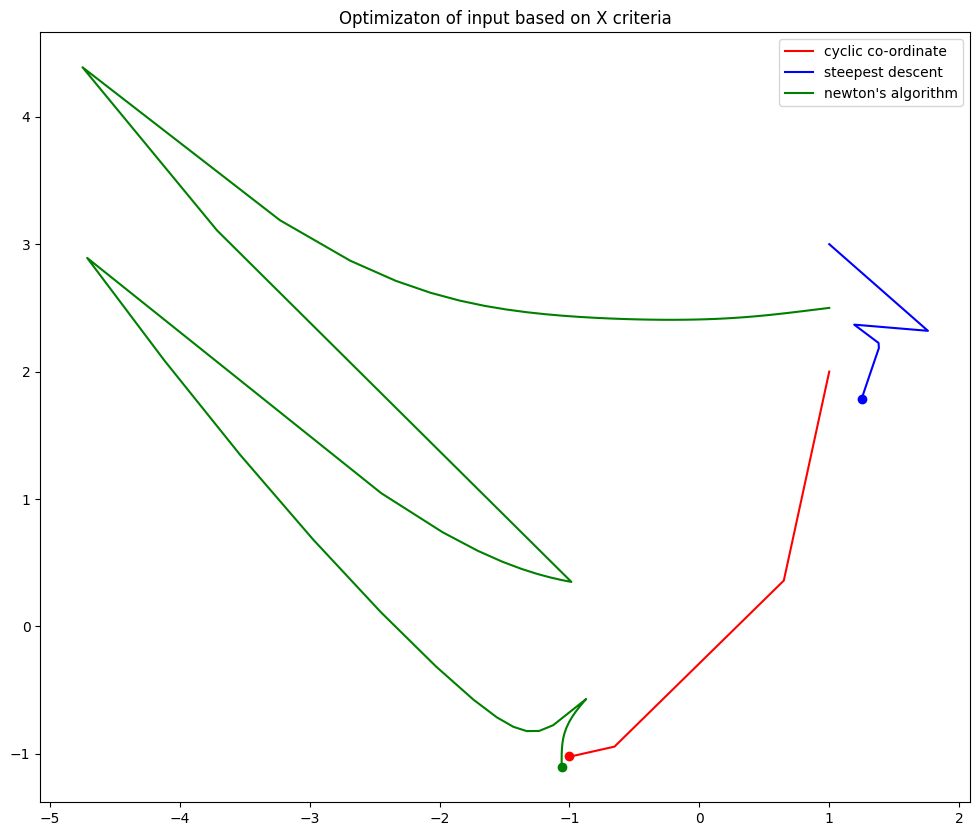

In [215]:
plt.figure(figsize=(12,10))

plt.plot(cyclic_cordinate_x_criteria_coord[:,0], cyclic_cordinate_x_criteria_coord[:,1], color='red', label='cyclic co-ordinate')
plt.scatter(cyclic_cordinate_x_criteria_coord[-1:,0], cyclic_cordinate_x_criteria_coord[-1:,1], color='red')

plt.plot(steepest_descent_x_criteria_coord[:,0], steepest_descent_x_criteria_coord[:,1], color='blue', label='steepest descent')
plt.scatter(steepest_descent_x_criteria_coord[-1:,0], steepest_descent_x_criteria_coord[-1:,1], color='blue')

plt.plot(newtons_x_criteria_coord[:,0], newtons_x_criteria_coord[:,1], color='green', label="newton's algorithm")
plt.scatter(newtons_x_criteria_coord[-1:,0], newtons_x_criteria_coord[-1:,1], color='green')

plt.title("Optimizaton of input based on X criteria")
plt.legend()
plt.show()

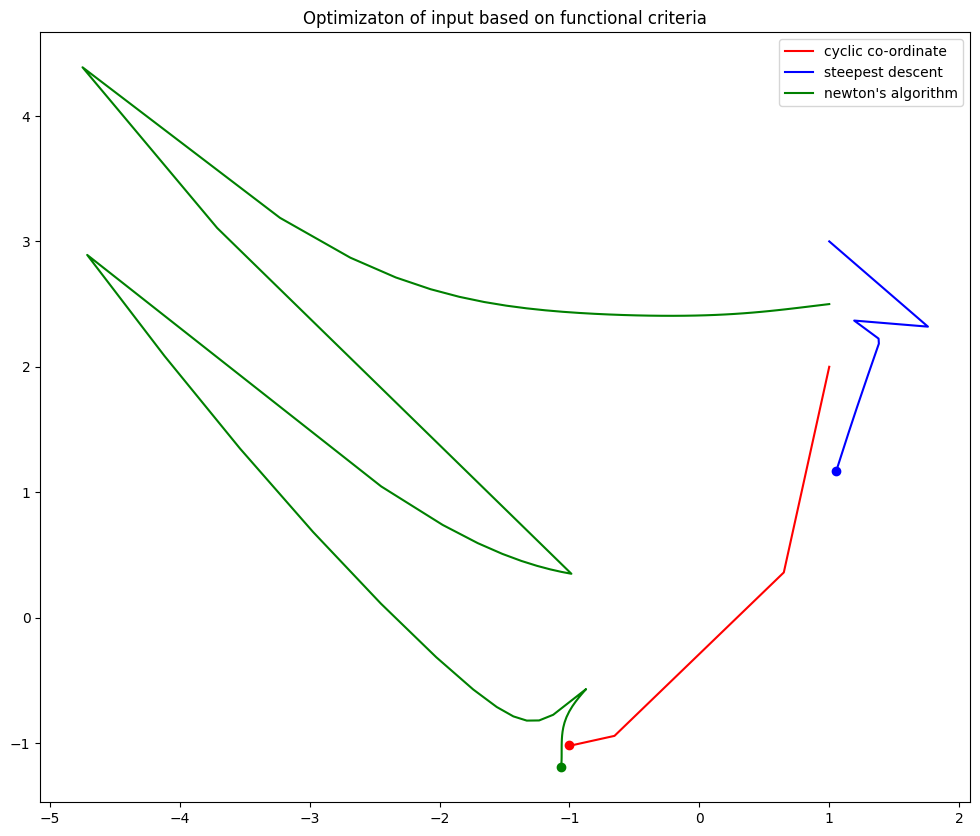

In [ ]:
plt.figure(figsize=(12,10))

plt.plot(cyclic_cordinate_fx_criteria_coord[:,0], cyclic_cordinate_fx_criteria_coord[:,1], color='red', label='cyclic co-ordinate')
plt.scatter(cyclic_cordinate_fx_criteria_coord[-1:,0], cyclic_cordinate_fx_criteria_coord[-1:,1], color='red')

plt.plot(steepest_descent_fx_criteria_coord[:,0], steepest_descent_fx_criteria_coord[:,1], color='blue', label='steepest descent')
plt.scatter(steepest_descent_fx_criteria_coord[-1:,0], steepest_descent_fx_criteria_coord[-1:,1], color='blue')

plt.plot(newtons_fx_criteria_coord[:,0], newtons_fx_criteria_coord[:,1], color='green', label="newton's algorithm")
plt.scatter(newtons_fx_criteria_coord[-1:,0], newtons_fx_criteria_coord[-1:,1], color='green')

plt.title("Optimizaton of input based on functional criteria")
plt.legend()
plt.show()

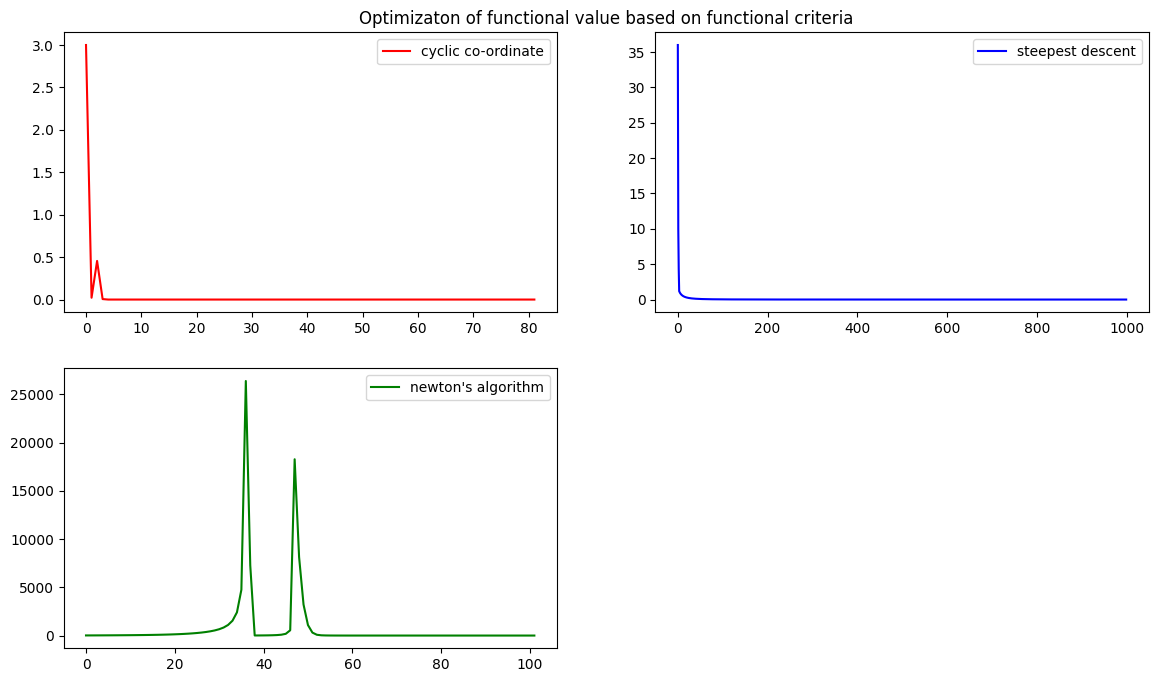

In [243]:
plt.figure(figsize=(14,8))
plt.title("Optimizaton of functional value based on functional criteria")
plt.axis('off')

plt.subplot(2,2,1)
plt.plot(cyclic_cordinate_fx_criteria_func, color='red', label='cyclic co-ordinate')
plt.legend()

plt.subplot(2,2,2)
plt.plot(steepest_descent_fx_criteria_func, color='blue', label='steepest descent')
plt.legend()

plt.subplot(2,2,3)
plt.plot(newtons_fx_criteria_func, color='green', label="newton's algorithm")
plt.legend()

plt.show()

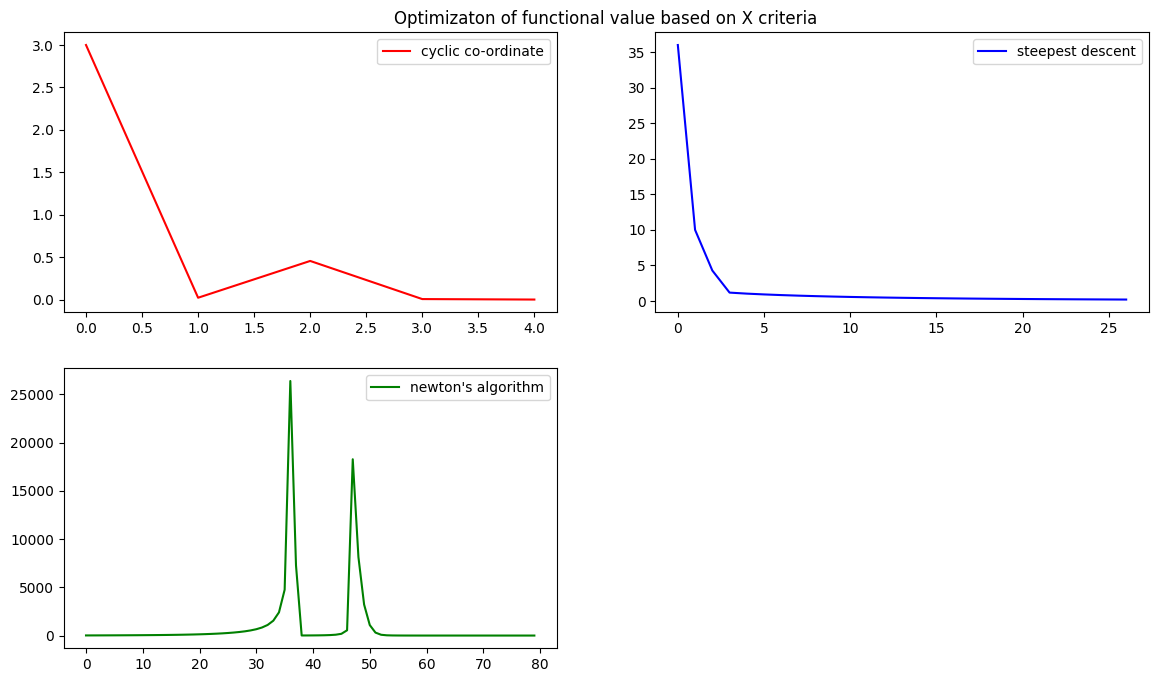

In [242]:
plt.figure(figsize=(14,8))
plt.title("Optimizaton of functional value based on X criteria")
plt.axis('off')

plt.subplot(2,2,1)
plt.plot(cyclic_cordinate_x_criteria_func, color='red', label='cyclic co-ordinate')
plt.legend()

plt.subplot(2,2,2)
plt.plot(steepest_descent_x_criteria_func, color='blue', label='steepest descent')
plt.legend()

plt.subplot(2,2,3)
plt.plot(newtons_x_criteria_func, color='green', label="newton's algorithm")
plt.legend()

plt.show()